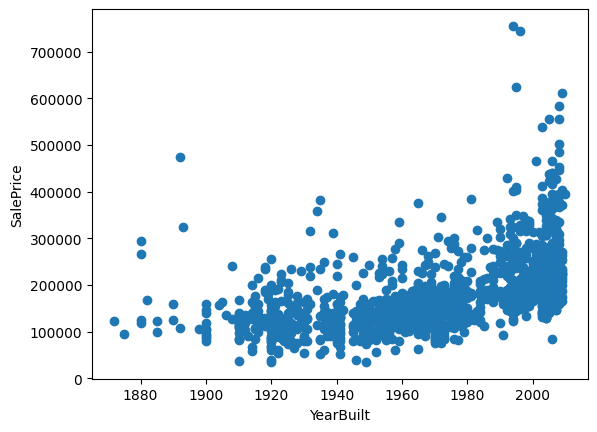

3705028693.3834515


C:\Users\Mohammed Khalil\workspace\python38\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Mohammed Khalil\workspace\python38\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Mohammed Khalil\workspace\python38\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Bagging ensemble learning
Mean Accuracy: 0.006 (0.005)


C:\Users\Mohammed Khalil\workspace\python38\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Mohammed Khalil\workspace\python38\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Mohammed Khalil\workspace\python38\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Stacking ensemble learning
Mean Accuracy: 0.013 (0.005)


In [1]:
# Assignment: Ensemble learning
# Objectives:
#  1. Understand ensemble learning

#  2. We will implement  three types of ensemble learning. Then check each effect on a smaller dataset.
#    a. Blending
#    b. Bagging
#    c. Stacking
# -----------------------------------------------------------------------------------------------------

from numpy import mean
from numpy import std
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Preparing a small dataset 
# -------------------------
dataset = pd.read_csv("train.csv")
X = dataset.loc[:, ['YearBuilt']]
y = dataset.loc[:, ['SalePrice']]
X = X.values
y = y.values

plt.scatter(X, y)
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

# Problem 1: Blending scratch mounting 
# ------------------------------------
# initializing all the model objects with default parameters
model_1 = LinearRegression()
model_2 = RandomForestRegressor()
 
# training all the model on the training dataset
model_1.fit(X_train, y_train.ravel())
model_2.fit(X_train, y_train.ravel())
 
# predicting the output on the validation dataset
pred_1 = model_1.predict(X_test)
pred_2 = model_2.predict(X_test)
 
# final prediction after averaging on the prediction of all 3 models
pred_final = (pred_1+pred_2)/2.0

# printing the mean squared error between real value and predicted value
print(mean_squared_error(y_test, pred_final))



# Problem 2:  Scratch mounting of bagging
# ---------------------------------------
# create the synthetic classification dataset
# X, y = make_classification(random_state=1)

# configure the ensemble model
model = BaggingClassifier(n_estimators=50)

# configure the resampling method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate the ensemble on the dataset using the resampling method
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report ensemble performance
print('Bagging ensemble learning')
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

#  Problem 3 Stacking scratch mounting
# ------------------------------------
# create the synthetic classification dataset
# X, y = make_classification(random_state=1)

# configure the models to use in the ensemble
models = [('knn', KNeighborsClassifier()), ('tree', DecisionTreeClassifier())]

# configure the ensemble model
model = StackingClassifier(models, final_estimator=LogisticRegression(), cv=3)

# configure the resampling method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate the ensemble on the dataset using the resampling method
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report ensemble performance
print('Stacking ensemble learning')
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
